# Deeplearning from scratch

source : https://www.youtube.com/watch?v=5TpBe7KTAHE&list=PLO_fdPEVlfKoanjvTJbIbd9V5d9Pzp8Rw&index=5

## 1er neurone simple, fonction d'activation sigmoïde

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import plotly.graph_objects as go
from plotly.subplots import make_subplots


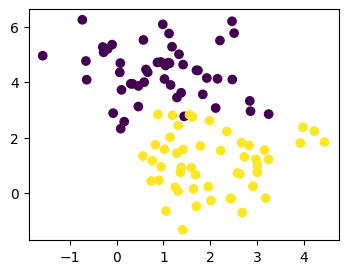

In [101]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0],1))
plt.figure(figsize=(4,3))
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [102]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [103]:
W,b = initialisation(X)

### Modèle : 

In [104]:
def model(X,W,b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [105]:
print(W.shape)
print(b.shape)

(2, 1)
(1,)


In [106]:
A = model(X,W,b)
A.shape

(100, 1)

### Fonction Log-Loss : &nbsp; &nbsp; &nbsp; $$\normalsize L=-\dfrac{1}{m} \sum_{i=0}^{m} y_i log(a_i) + (1-y_i) log(1-a_i) $$

In [107]:
def log_loss(A,y):
    eps = 1e-15
    L = (-1/A.shape[0]) * np.sum(y * np.log(A + eps) + (1 - y) * np.log(1 - A + eps))
    return L

In [108]:
L = log_loss(A,y)
L

1.5688082960375564

### Le calcul des gradients : 
$$\Large 
\left\{
    \begin{array}{ll}
        \frac{\partial L}{\partial W} = \frac{1}{m} X^T . (A-y) \\
        \\
        \frac{\partial L}{\partial b} = \frac{1}{m} \sum_{} (A-y)
    \end{array}
\right. 
$$

In [109]:
def gradients(X,A,y):
    dW = (1/X.shape[0])*np.dot(X.T,(A - y)) 
    db = (1/X.shape[0]) * np.sum(A - y)
    return dW, db

### Fonction de prédiction : on retourne 1 lorsque la fonction d'activation retourne un nombre >= 0.5, 0 sinon

In [110]:
def predict(X,W,b):
    A = model(X,W,b)
    return A >= 0.5

### Descente de gradient

In [143]:
from sklearn.metrics import accuracy_score
from tqdm import tqdm

def neuron(X_train, y_train, X_test, y_test, learning_rate=0.1, n_epochs=100):
    
    W, b = initialisation(X_train)
    loss_test = []
    loss_train = []
    accuracy_hist_train = []
    accuracy_hist_test = []
    for i in tqdm(range(n_epochs)):
        A = model(X_train,W,b)
        #calcul des gradients:
        dW, db = gradients(X_train,A,y_train)
        #update des gradients:
        W -= learning_rate * dW
        b -= learning_rate * db
        #calcul du coût et de l'accuracy, tous les 10 pas:
        if i % 10 == 0:
            # Train
            accuracy_hist_train.append(accuracy_score(y_train,predict(X_train,W,b)))
            loss_train.append(log_loss(A,y_train))
            # test
            A_test = model(X_test,W,b)
            accuracy_hist_test.append(accuracy_score(y_test,predict(X_test,W,b)))
            loss_test.append(log_loss(A_test,y_test))
            
    #y_pred = predict(X_train,W,b)
    #print(f"Training accuracy score : {accuracy_score(y_train,y_pred)}")
    #print(f"Testing accuracy score : {accuracy_score(y_test,y_pred)}")
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(range(len(loss_train)),loss_train, label="Train loss function")
    plt.plot(range(len(loss_test)),loss_test, label="Test loss function")
    plt.title("Loss function")
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(range(len(accuracy_hist_train)),accuracy_hist_train, label="Train accuracy")
    plt.plot(range(len(accuracy_hist_test)),accuracy_hist_test, label="Test accuracy")
    plt.title("Accuracy")
    plt.legend()
    plt.show()
    
    return W,b,loss_train

In [113]:
Wfinal,bfinal,Lossfinal = neuron(X,y)

TypeError: neuron() missing 2 required positional arguments: 'X_test' and 'y_test'

W final : [[ 0.93090902 -1.07258458]],
b final : [1.10943201]


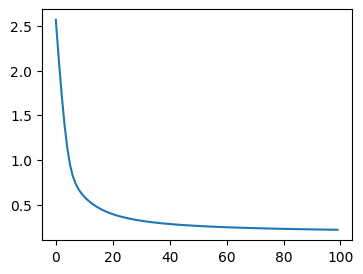

In [114]:
print(f"W final : {Wfinal.T},\nb final : {bfinal}")
plt.figure(figsize=(4,3))
plt.plot(range(100),Lossfinal)
plt.show()

### On veut tracer la frontière de décision $\Longleftrightarrow$ lorsque z=0 
$$\begin{align*} 
& \large z(x_1,x_2) = 0 \\
& \large \Longleftrightarrow w_1.x_1 + w_2.x_2 + b = 0 \\
& \large \Longleftrightarrow x_2 = b - \frac{w_1.x_1}{w_2}
\end{align*} 
$$

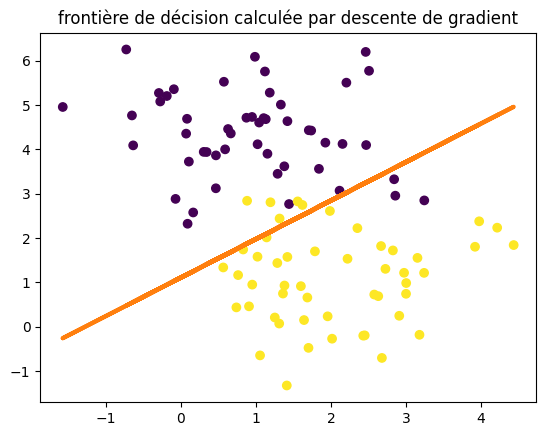

In [115]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.plot(X[:,0],bfinal-(Wfinal[0]*X[:,0])/Wfinal[1],c='C1',lw=3)
plt.plot()
plt.title("frontière de décision calculée par descente de gradient")
plt.show()

### Visualisation 3D de la frontière de décision, avec les données d'entraînement classifiées de part et d'autre

In [116]:
# fonction Z de forme sigmoïde
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
xx0, xx1 = np.meshgrid(X0, X1)
Z = Wfinal[0] * xx0 + Wfinal[1] * xx1 + bfinal
A = 1 / (1 + np.exp(-Z))

fig = (go.Figure(data=[go.Surface(z=A, x=xx0, y=xx1, colorscale='YlGn', opacity = 0.7, reversescale=True)]))

fig.add_scatter3d(x=X[:, 0].flatten(), y=X[:, 1].flatten(), z=y.flatten(), mode='markers', marker=dict(size=5, color=y.flatten(), colorscale='YlGn', opacity = 0.9, reversescale=True))


fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()

### Forme de la fonction coût

In [117]:
# on crée la grille de 100x100 points, 
# et les poids W1 et W2 vont varier de -10 à +10 avec un pas de 1/100ème
lim = 10
h = 100
W1 = np.linspace(-lim,lim,h)
W2 = np.linspace(-lim,lim,h)

W11,W22 = np.meshgrid(W1, W2)

In [118]:
# concaténation des vecteurs poids, 
W_f = np.c_[W11.ravel(),W22.ravel()].T
# >> W_f.shape 
# >> (2, 10000)

In [119]:
# Autre expression de la concatenation c_
#np.hstack((W11.ravel().reshape(len(W11.ravel()),1),
#           W22.ravel().reshape(len(W22.ravel()),1))).T

In [120]:
Z = X.dot(W_f) + bfinal

A = 1/(1 + np.exp(-Z))

#### On veut exprimer la fonction coût, on doit arranger son expression par rapports aux entrées W11 et W22 sous forme de grille orthogonale de points  

In [121]:
eps = 1e-15
L = (-1/A.shape[0]) * np.sum(y * np.log(A + eps) + (1 - y) * np.log(1 - A + eps), axis = 0).reshape(W11.shape)


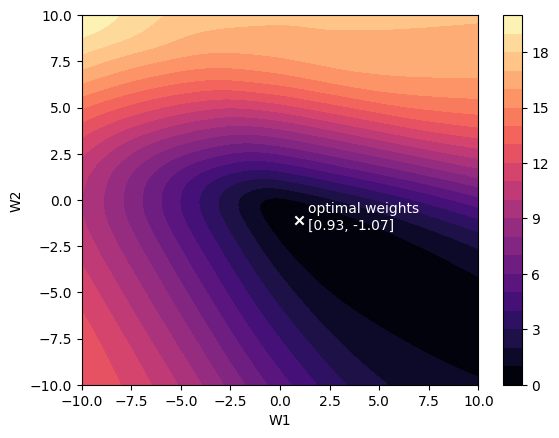

In [122]:
plt.contourf(W11, W22, L, 20, cmap="magma")
plt.colorbar()
plt.scatter(Wfinal[0],Wfinal[1],c='white', marker="x")
plt.xlabel("W1")
plt.ylabel("W2")
plt.text(Wfinal[0]+0.5,Wfinal[1]-0.5,
         f'optimal weights\n{[round(Wfinal[0][0],2), round(Wfinal[1][0],2)]}', 
         c="white")
plt.show()

In [123]:
Wfinal

array([[ 0.93090902],
       [-1.07258458]])

In [124]:
L.min()

0.20326396878017539

In [125]:
# Représentation 3d de la fonction coût, avec le min atteint (point blanc)
fig = go.Figure(data=[(go.Surface(z=L, x=W11, y=W22, colorscale='YlOrRd', opacity = 0.7, reversescale=True))])

fig.add_scatter3d(x=Wfinal[0], y=Wfinal[1], z=np.array(L.min()),
                  mode='markers', marker=dict(size=4, color='white', opacity = 0.9, reversescale=True))

fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()

## Mise en pratique : classification Chats/Chiens

In [127]:
import h5py

def load_data():
    train_dataset = h5py.File('datasets/trainset.hdf5', "r")
    X_train = np.array(train_dataset["X_train"][:]) # your train set features
    y_train = np.array(train_dataset["Y_train"][:]) # your train set labels

    test_dataset = h5py.File('datasets/testset.hdf5', "r")
    X_test = np.array(test_dataset["X_test"][:]) # your train set features
    y_test = np.array(test_dataset["Y_test"][:]) # your train set labels
    
    return X_train, y_train, X_test, y_test

In [128]:
X_train, y_train, X_test, y_test = load_data()

### Normalisation

In [129]:
X_train_reshape = X_train.reshape(X_train.shape[0],-1) / X_train.max()
X_test_reshape = X_test.reshape(X_test.shape[0],-1) / X_train.max()

100%|██████████| 10000/10000 [00:39<00:00, 251.33it/s]


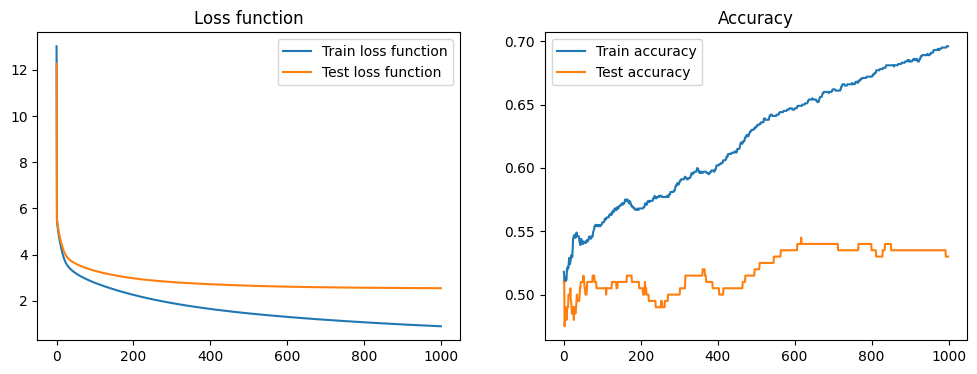

In [144]:
W, b, _ = neuron(X_train_reshape, y_train, X_test_reshape, y_test, learning_rate=0.01, n_epochs=10000)

## Belle démonstration que l'on a traité un cas complexe avec un modèle trop simple : 1 neurone => modèle linéaire. 
### Sans parler du "fléau de la dimension" ici avec 64x64 pixels, 4096 variables et autant de dimensions dans lesquelles on fait des régressions linéaires (ou plutôt logistiques)...